In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import pickle

from os.path import exists

import spacy

In [2]:
train_data_path = '/Users/andrewcoogan/Documents/Not Source Control/Text Feedback and Classification Data/'
test_data_path = '/Data/test/'

In [3]:
def save_data(obj, name : str):
    with open(f'Data/{name}.pkl', 'wb') as fid:
        pickle.dump(obj, fid)  

def load_data(name : str):
    with open(f'Data/{name}.pkl', 'rb') as fid:
        model = pickle.load(fid)
    return model

In [4]:
id_to_check = '62C57C524CD2'
open(f'{train_data_path}train/{id_to_check}.txt', 'r').read()

"I think we should be able to play in a sport if we have a grade C. I think i would be not fear for student that have a good grade like c to play in a sport. If we had a D or an F i would understand that but a C i nothing. Not a lot of kid get A or Bs and if we do. Some of those kids don't like to play a sport they like to do all there homework not that i am saying that a bad C grade people do there homework to. If there is only 1 out of 4 percent of student that get A and B, They all don't like the same sports and some don't like to do sports so it wouldn't be a hole team in that sport. that means you would have to cancel all the sport teams in the school. That why you should let C student play an a sport."

In [5]:
train = pd.read_csv(train_data_path + 'train.csv')
# train.loc[train.id == id_to_check]
train.query(f'id == "{id_to_check}"')

id  discourse_id  discourse_start  discourse_end  \
73038  62C57C524CD2  1.617199e+12              0.0           66.0   
73039  62C57C524CD2  1.617199e+12             67.0          156.0   
73040  62C57C524CD2  1.617199e+12            157.0          202.0   
73041  62C57C524CD2  1.617199e+12            203.0          221.0   
73042  62C57C524CD2  1.617199e+12            222.0          414.0   
73043  62C57C524CD2  1.617199e+12            415.0          593.0   
73044  62C57C524CD2  1.617199e+12            594.0          664.0   
73045  62C57C524CD2  1.617199e+12            665.0          715.0   

                                          discourse_text  \
73038  I think we should be able to play in a sport i...   
73039  I think i would be not fear for student that h...   
73040      If we had a D or an F i would understand that   
73041                                 but a C i nothing.   
73042  Not a lot of kid get A or Bs and if we do. Som...   
73043  If there is only 1 out of 4 percent of student...   
73044  that means you would have to cancel all the sp...   
73045  That why you should let C student play an a sp...   

             discourse_type      discourse_type_num  \
73038              Position              Position 1   
73039              Evidence              Evidence 1   
73040          Counterclaim          Counterclaim 1   
73041              Rebuttal              Rebuttal 1   
73042              Evidence              Evidence 2   
73043                 Claim                 Claim 1   
73044              Evidence              Evidence 3   
73045  Concluding Statement  Concluding Statement 1   

                                        predictionstring  
73038           0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16  
73039  17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 3...  
73040                38 39 40 41 42 43 44 45 46 47 48 49  
73041                                     50 51 52 53 54  
73042  55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 7...  
73043  100 101 102 103 104 105 106 107 108 109 110 11...  
73044  140 141 142 143 144 145 146 147 148 149 150 15...  
73045        154 155 156 157 158 159 160 161 162 163 164

In [6]:
train.shape

(144293, 8)

# EDA with some Spacy

In [7]:
def clean_text(text : str) -> str:
    # Need to think on this one.
    return text

In [8]:
nlp = spacy.load('en_core_web_sm')

In [15]:
if exists('Data/pos_counter.pkl'):
    counter_dict = load_data('pos_counter')
else:
    discourse_types = list(set(train.discourse_type))
    counter_dict = {}

    name = 'pos_tagging_counter'

    for d_t in discourse_types:
        counter_dict[d_t] = Counter()

    for _, row in tqdm(train.iterrows(), total=train.shape[0]):
        counter_dict[row.discourse_type].update(
            [t.pos_ for t in nlp(row.discourse_text)]
        )
        
    save_data(counter_dict, 'pos_counter')
    
counter_dict

{'Evidence': Counter({'DET': 379860,
          'ADJ': 242308,
          'NOUN': 723042,
          'ADP': 364783,
          'PROPN': 74715,
          'VERB': 582526,
          'ADV': 214918,
          'SCONJ': 91799,
          'PRON': 343522,
          'PUNCT': 328053,
          'INTJ': 3642,
          'CCONJ': 131467,
          'PART': 154991,
          'AUX': 243085,
          'SPACE': 25854,
          'NUM': 37970,
          'SYM': 1694,
          'X': 1008}),
 'Rebuttal': Counter({'DET': 13803,
          'NOUN': 23286,
          'VERB': 19566,
          'ADJ': 8675,
          'SCONJ': 3702,
          'AUX': 9751,
          'ADP': 11375,
          'PUNCT': 10682,
          'PART': 5913,
          'PRON': 11738,
          'ADV': 8447,
          'CCONJ': 5281,
          'SPACE': 1147,
          'PROPN': 1489,
          'SYM': 25,
          'X': 15,
          'NUM': 726,
          'INTJ': 193}),
 'Concluding Statement': Counter({'DET': 83909,
          'NOUN': 168523,
          'ADV': 4

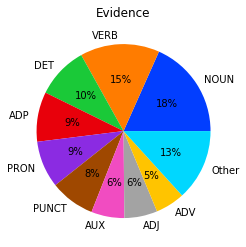

In [16]:
# Most common n, with other
def most_common_n(ctr : Counter, n : int = 9):
    mc = ctr.most_common()
    total = sum(n for _, n in mc)

    top_n = mc[:n]
    top_n.append(('Other', total - sum(n for _, n in top_n)))
    top_n_pct = [(n, round(p / total, 4)) for n, p in top_n]

    return top_n_pct

tt = most_common_n(counter_dict['Evidence'])
colors = sns.color_palette('bright')[0:10]
plt.pie([d for _, d in tt], labels = [d for d, _ in tt], colors = colors, autopct='%.0f%%')
plt.title('Evidence')
plt.show()

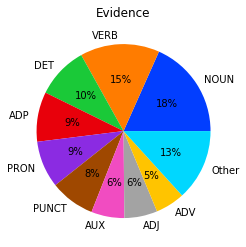

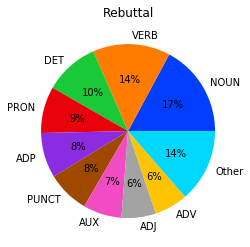

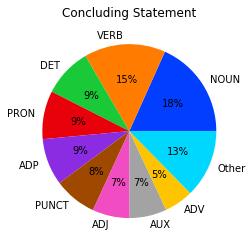

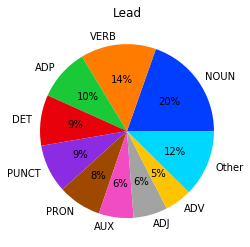

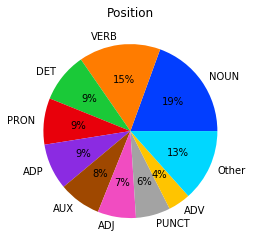

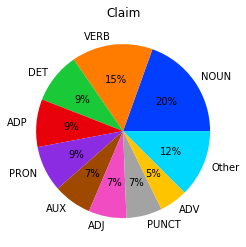

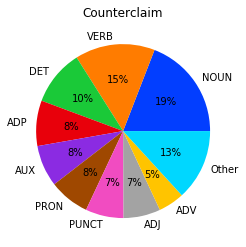

In [17]:
colors = sns.color_palette('bright')[0:10]
for k in counter_dict:
    mcn = most_common_n(counter_dict[k])
    plt.pie([d for _, d in mcn], labels = [d for d, _ in mcn], colors = colors, autopct='%.0f%%')
    plt.title(k)
    plt.show()

In [18]:
output = pd.DataFrame(columns=counter_dict.keys())
for counter_key in counter_dict:
    kk = most_common_n(counter_dict[counter_key])
    for kind in kk:
        output.loc[kind[0], counter_key] = kind[1]
output

Evidence Rebuttal Concluding Statement    Lead Position   Claim  \
NOUN    0.1833   0.1715               0.1829  0.1961   0.1944  0.1952   
VERB    0.1477   0.1441               0.1513  0.1404   0.1519  0.1509   
DET     0.0963   0.1016               0.0911  0.0943   0.0926  0.0948   
ADP     0.0925   0.0838               0.0868  0.0963   0.0856  0.0887   
PRON    0.0871   0.0864               0.0897  0.0806   0.0862  0.0855   
PUNCT   0.0832   0.0787               0.0796  0.0899   0.0642  0.0666   
AUX     0.0616   0.0718               0.0691  0.0645   0.0785  0.0709   
ADJ     0.0614   0.0639               0.0692  0.0634   0.0711  0.0702   
ADV     0.0545   0.0622                0.054  0.0505   0.0415  0.0525   
Other   0.1326   0.1361               0.1264  0.1239    0.134  0.1248   

      Counterclaim  
NOUN        0.1912  
VERB        0.1485  
DET         0.1036  
ADP         0.0844  
PRON        0.0752  
PUNCT       0.0708  
AUX         0.0771  
ADJ         0.0687  
ADV         0.0484  
Other       0.1321

In [19]:
train['discourse_len'] = train['discourse_text'].apply(lambda l: len(l.split()))
train['predictionstring_len'] = train['predictionstring'].apply(lambda l: len(l.split()))
train['len_predict'] = train.apply(lambda l: 0 if l['discourse_len'] == l['predictionstring_len'] else 1, axis=1)

print(f'The number discourse length errors: {train.len_predict.sum()}.')
print(f'Which is {train.len_predict.sum() / train.shape[0]:.2%}.')
train.head()

The number discourse length errors: 468.
Which is 0.32%.


id  discourse_id  discourse_start  discourse_end  \
0  423A1CA112E2  1.622628e+12              8.0          229.0   
1  423A1CA112E2  1.622628e+12            230.0          312.0   
2  423A1CA112E2  1.622628e+12            313.0          401.0   
3  423A1CA112E2  1.622628e+12            402.0          758.0   
4  423A1CA112E2  1.622628e+12            759.0          886.0   

                                      discourse_text discourse_type  \
0  Modern humans today are always on their phone....           Lead   
1  They are some really bad consequences when stu...       Position   
2  Some certain areas in the United States ban ph...       Evidence   
3  When people have phones, they know about certa...       Evidence   
4  Driving is one of the way how to get around. P...          Claim   

  discourse_type_num                                   predictionstring  \
0             Lead 1  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
1         Position 1       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
2         Evidence 1    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
3         Evidence 2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
4            Claim 1  139 140 141 142 143 144 145 146 147 148 149 15...   

   discourse_len  predictionstring_len  len_predict  
0             44                    44            0  
1             15                    15            0  
2             16                    16            0  
3             63                    63            0  
4             24                    24            0

In [20]:
# How many are we missing per discourse_type?
train_errors = train.query('len_predict == 1')

df1 = train_errors.groupby('discourse_type').agg({'len_predict':'sum'}).reset_index()
df2 = train.groupby('discourse_type').agg({'discourse_len':'count'}).reset_index()
df3 = pd.merge(df1, df2, on="discourse_type", how="left")
df3['Fail_Rate_per_DT'] = df3['len_predict'] / df3['discourse_len']

print(df3)

         discourse_type  len_predict  discourse_len  Fail_Rate_per_DT
0                 Claim          173          50208          0.003446
1  Concluding Statement          101          13505          0.007479
2          Counterclaim           12           5817          0.002063
3              Evidence          111          45702          0.002429
4                  Lead           23           9305          0.002472
5              Position           38          15419          0.002464
6              Rebuttal           10           4337          0.002306


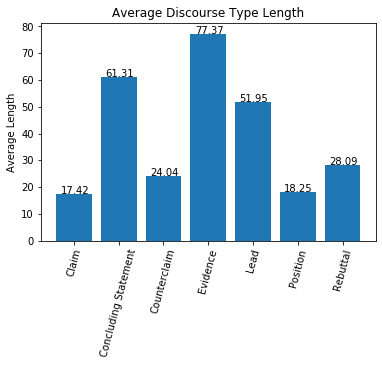

In [21]:
# What about the lengths of each different discourse type?
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.3, y[i], f'{y[i]:.2f}')

df1 = train.groupby('discourse_type').agg({'discourse_len':'mean'}).reset_index()
plt.bar(df1['discourse_type'], df1['discourse_len'])
plt.xticks(rotation=75)
plt.title('Average Discourse Type Length')
plt.ylabel('Average Length')
addlabels(df1['discourse_type'], df1['discourse_len'])
plt.show()

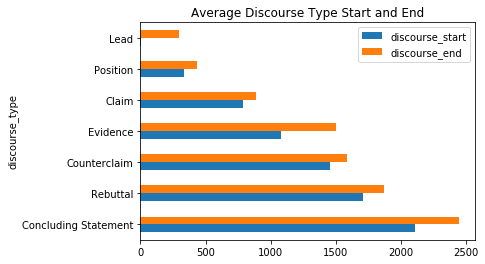

In [30]:
# What about starting positions?
df1 = train.groupby('discourse_type')['discourse_start', 'discourse_end'].\
    mean().reset_index().sort_values(by='discourse_start', ascending=False)

df1.plot(
    x = 'discourse_type',
    kind='barh',
    stacked=False,
    title='Average Discourse Type Start and End'
)

In [ ]:
# How are we going to proceed?
# Should lemma everything first.
# Use spacy and get the parts of speech for each of the discourse_types. See distribution of the data.
# Can also use the complexity assesment while I am at it.
# For this we can also us a counter, good to show and pactice useage of that.


In [ ]:
test = 'abcdefg'
for l in test:
    print(test.index(l))

In [ ]:
tt = nlp('hello how are you Drew? It is a wonderful day.')

In [ ]:
[t.pos_ for t in tt]